## HW #2- NYC Restaurants

# Setup

In [16]:
"""This is where I read in the csv file to begin the assignment"""

import os
os.chdir("C:\\Users\\vsm397\\Desktop\\Vir's Personal documents\\Python Class- Summer 2018\\HW Assignment #2")

from pandas import Series, DataFrame
import pandas as pd
%pylab inline
df = pd.read_csv("NYC_Restaurants (HW#2 Data).csv", dtype = unicode)
df

Populating the interactive namespace from numpy and matplotlib


,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,2/12/2015,Cycle Inspection / Re-inspection
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,2/12/2015,Cycle Inspection / Re-inspection
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,2/12/2015,Cycle Inspection / Initial Inspection
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,2/12/2015,Cycle Inspection / Initial Inspection
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,2/12/2015,Cycle Inspection / Initial Inspection
5,5,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,20,Z,11/24/2014,2/12/2015,Cycle Inspection / Re-inspection
6,6,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,20,Z,11/24/2014,2/12/2015,Cycle Inspection / Re-inspection
7,7,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,20,Z,11/24/2014,2/12/2015,Cycle Inspection / Re-inspection
8,8,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,20,Z,11/24/2014,2/12/2015,Cycle Inspection / Re-inspection
9,9,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369,7183350505,American,11/15/2014,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,38,Z,11/15/2014,2/12/2015,Cycle Inspection / Re-inspection


# Q1

In [17]:
"""A new column called 'Restaurant' was created and added to the original dataframe"""

df['RESTAURANT'] = df['DBA'] + " " + df['BUILDING'] + " " + df['STREET'] + " " + df['ZIPCODE']
restaurants = df['RESTAURANT']

df_clean = df.drop_duplicates(["RESTAURANT"])
df_clean = df_clean.replace("Missing", np.nan)
restaurants[:10]


0                    WENDY'S 469 FLATBUSH AVENUE 11225
1                    WENDY'S 469 FLATBUSH AVENUE 11225
2                    WENDY'S 469 FLATBUSH AVENUE 11225
3                    WENDY'S 469 FLATBUSH AVENUE 11225
4                    WENDY'S 469 FLATBUSH AVENUE 11225
5               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8               TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

# Q2

In [18]:
"""After adding the new column to the dataframe, we want to see the length of the new column"""

len(restaurants.value_counts())

10114

# Q3

In [19]:
"""Here we determined how many restaurants occurred more than once in the dataset, and refer to these as 'Chains'"""

chains_df = df[["RESTAURANT", "DBA"]]
chains_drop = chains_df.drop_duplicates()
chains = chains_drop["DBA"].value_counts()
sum(chains >= 2)

368

# Q4

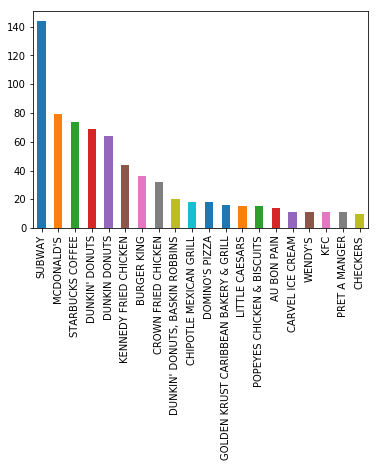

In [20]:
"""We plot the 20 most popular chains in the dataset"""

chains[:20].plot(kind = 'bar');

# Q5

In [21]:
"""We use the two columns we have created and divide to determine the ratio of what % are considered Chains"""

float(sum(chains >=2)) / float(len(restaurants.value_counts()))

0.036385208621712475

# Q6

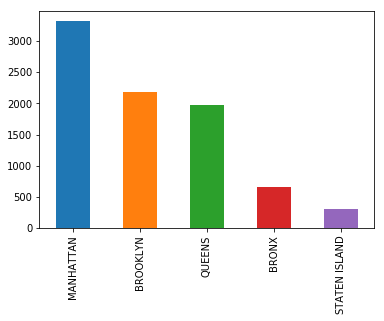

In [22]:
"""Now we take the inverse from the previous problems and find Non-Chains. Then, look to find frequencies per Borough"""

non_chains = chains[chains == 1]
df['NON CHAINS'] = df["DBA"].isin(non_chains.keys())
df[df["NON CHAINS"]==True]

non_chains_df = df.drop_duplicates(["RESTAURANT"])
non_chains_df = non_chains_df[non_chains_df["NON CHAINS"] == True]

non_chains_df = non_chains_df.replace("Missing", np.nan)
non_chains_df["BORO"].value_counts().plot(kind="bar");

# Q7

MANHATTAN        4001
BROOKLYN         2529
QUEENS           2321
BRONX             855
STATEN ISLAND     394
Name: BORO, dtype: int64

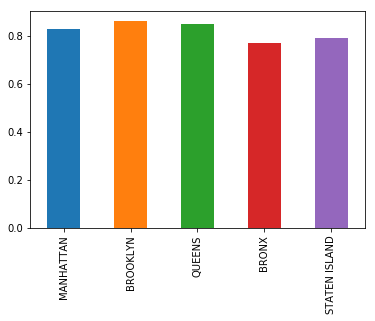

In [24]:
"""To evaluate Boroughs, we plot how many restaurants in each Borough are Non-Chains"""

boro_counts = non_chains_df["BORO"].value_counts()
boro_counts = boro_counts.replace("Missing", np.nan)


total_boro_counts = df_clean["BORO"].value_counts()
total_boro_counts = total_boro_counts.replace("Missing", np.nan)

boro_fractions = boro_counts / total_boro_counts
boro_fractions = boro_fractions.replace("Missing", np.nan)

boro_fractions.plot(kind="bar")
boro_counts
total_boro_counts
## The Borough with the most independent restaurants is NOT also the one with the highest ratio of independent ratios- Manhattan vs Brooklyn

# Q8

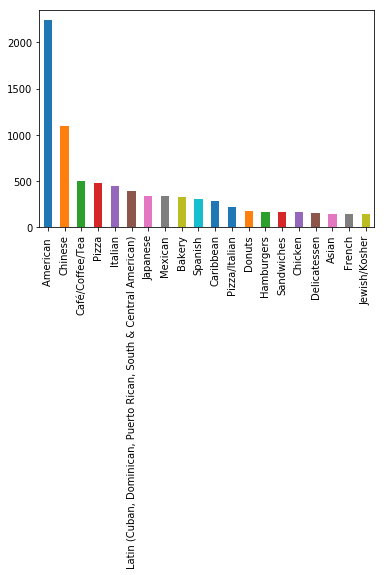

In [25]:
"""The popularity is a figure that is determined by frequencies, and the respective frequencies are plotted"""

top_cuisine = df_clean["CUISINE DESCRIPTION"].value_counts()
top_cuisine[:20].plot(kind = 'bar');

# Q9

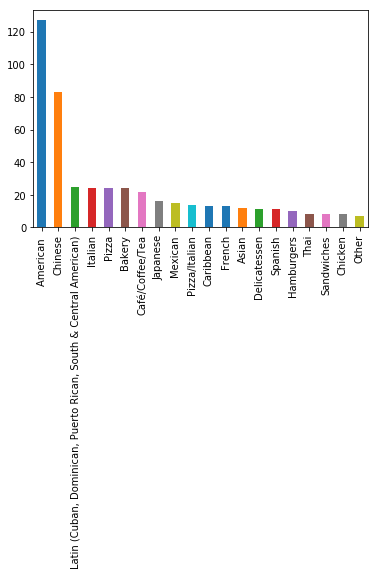

In [26]:
"""Forunately the values were considered null for restaurants that never got cited, so we were able to determine those frequencies and plot"""

cited = df[df["VIOLATION CODE"].isnull()]
popular_clean = cited["CUISINE DESCRIPTION"]
top_clean = popular_clean.value_counts()
top_clean[:20].plot(kind = 'bar');

# Q10

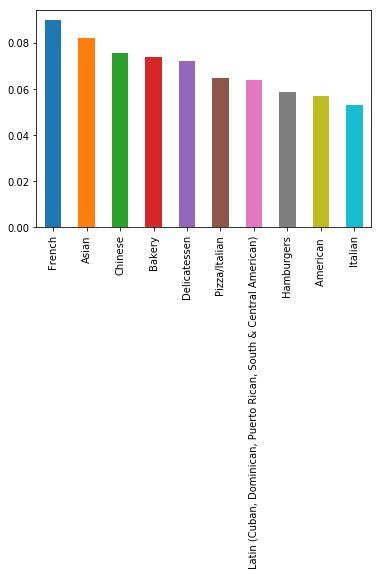

In [27]:
"""These are the 10 most popular cuisines that are also very likely to be clean"""

cuisine_list = df_clean["CUISINE DESCRIPTION"].value_counts() >= 20
cuisine_list = cuisine_list.replace("Missing", np.nan)

clean_cuisines = cuisine_list[cuisine_list == True]
top_twenty = clean_cuisines[:20]
top_twenty.index

q9 = top_clean[top_clean.index.isin(top_twenty.index)]
q8 = top_cuisine[top_cuisine.index.isin(top_twenty.index)]
ratio = q9 / q8
order = ratio.sort_values(ascending=False)
order[:10].plot(kind = 'bar');

# Q11

In [28]:
"""In each respective Borough, highest frequency for each type of violation was reported"""

df[df["VIOLATION CODE"].isnull()]
violation_table = pd.crosstab(df["VIOLATION DESCRIPTION"], df["BORO"])
violation_table.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
Missing          Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

# Q12

In [29]:
"""This was a brute force method to normalize the violation counts in each Borough. The two previous questions were used to normalize the data"""

violationFrequency = df["VIOLATION DESCRIPTION"].value_counts()

df[df["VIOLATION CODE"].isnull()]
violation_table = pd.crosstab(df["VIOLATION DESCRIPTION"], df["BORO"])
violation_table

bronx_normal = violation_table["BRONX"] / violationFrequency
brooklyn_normal = violation_table["BROOKLYN"] / violationFrequency
manhattan_normal = violation_table["MANHATTAN"] / violationFrequency
queens_normal = violation_table["QUEENS"] / violationFrequency
statenisland_normal = violation_table["STATEN ISLAND"] / violationFrequency

print "Most Common Violation in Bronx is :", bronx_normal.idxmax()
print ""
print "Most Common Violation in Broooklyn is :", brooklyn_normal.idxmax()
print ""
print "Most Common Violation in Manhattan is :", manhattan_normal.idxmax()
print ""
print "Most Common Violation in Queens is :", queens_normal.idxmax()
print ""
print "Most Common Violation in Staten Island is :", statenisland_normal.idxmax()


Most Common Violation in Bronx is : Unprotected food re-served.

Most Common Violation in Broooklyn is : Precooked potentially hazardous food from commercial food processing establishment that is supposed to be heated, but is not heated to 140º F within 2 hours.

Most Common Violation in Manhattan is : Out-of package sale of tobacco products observed.

Most Common Violation in Queens is : Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes.

Most Common Violation in Staten Island is : Eggs found dirty/cracked; liquid, frozen or powdered eggs not pasteurized.


# Q13

In [30]:
"""A new table was created that has the first 3 digits of a phone number and zipcode. Then, the length of the occurences of non-equivalence was found"""

df[["PHONE", "ZIPCODE"]]
df["PHONE 3"] = df["PHONE"].apply(lambda x: x[:3])
phone_zip = df[["PHONE 3", "ZIPCODE"]].drop_duplicates()
unique_phone_zip = phone_zip["PHONE 3"].value_counts()
unique_phone_zip == 1
len(unique_phone_zip[unique_phone_zip == True])

34

# Q14

In [31]:
"""This was a neat approach to determine the most common misspellings of street names. Essentially new columns were created and compared to determine locations of inequality"""

df_clean["STREET TYPE"] = df_clean["STREET"].apply(lambda x: x.split()[-1])

df_clean["STREET BASE"] = df_clean["STREET"].apply(lambda x: " ".join(x.split()[:-1]))

df_clean["STREET BASE & ZIP"] = df_clean['STREET BASE'] + " " + df_clean['ZIPCODE']
df
street_table = df_clean[["STREET TYPE", "STREET BASE", "STREET BASE & ZIP"]] 

merge_street_table = street_table.merge(street_table,
                                   left_on='STREET BASE & ZIP',
                                   right_on='STREET BASE & ZIP')
diff_street_types = merge_street_table[merge_street_table["STREET TYPE_x"] != merge_street_table["STREET TYPE_y"]]
diff_street_types
street_cross_tab = pd.crosstab(diff_street_types["STREET TYPE_x"], diff_street_types["STREET TYPE_y"])
final_street = street_cross_tab[["AVE", "ST", "RD", "PL", "BOULEARD", "BULEVARD"]]
final_street.idxmax()

STREET TYPE_y
AVE            AVENUE
ST             STREET
RD               ROAD
PL              PLACE
BOULEARD    BOULEVARD
BULEVARD    BOULEVARD
dtype: object